In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#About the data:

This is a dataset about housing prices derived from the U.S. Census Service.
We gonna play the roll of a data scientist that was hired to make statistics analysis on the data and get useful insights.

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [44]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,71 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


#Data Visualization

In [45]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 1. Boxplot

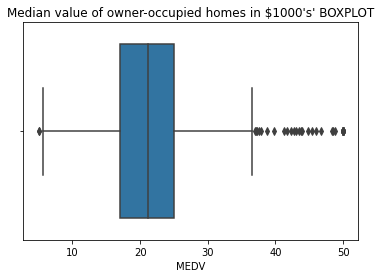

In [16]:
sns.boxplot(x= boston_df['MEDV'], data=boston_df);
plt.title("Median value of owner-occupied homes in $1000's' BOXPLOT");

### 2. Histogram for CHAS variable

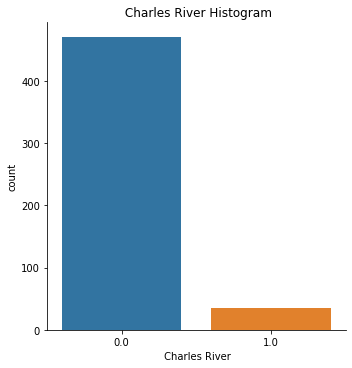

In [18]:
sns.catplot(x= 'CHAS', kind='count', data=boston_df);
plt.title(' Charles River Histogram');
plt.xlabel(' Charles River');

### 3.Boxplot to relationship between Age and MEDV

In [19]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 71), 'age_group'] = '71 years and older'

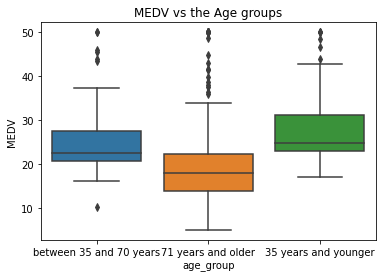

In [23]:
sns.boxplot(x= 'age_group', y='MEDV', data=boston_df);
plt.title('MEDV vs the Age groups');

### 4. Scatter plot for the Relationship between Nitric oxide  and the proportion of non-retail business acres per town

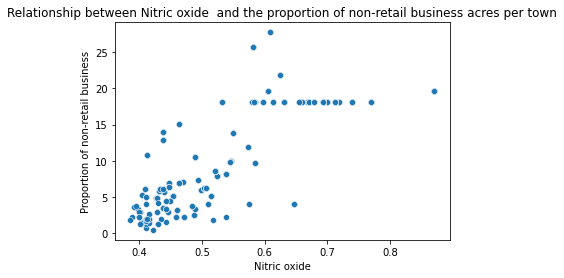

<Figure size 864x576 with 0 Axes>

In [28]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between Nitric oxide  and the proportion of non-retail business acres per town')
plt.xlabel('Nitric oxide')
plt.ylabel('Proportion of non-retail business')
plt.figure(figsize=(12, 8))

plt.show()

# I would say that there is a positive linear correlation.

###5. Histogram fot Pupil-teacher ratio by town

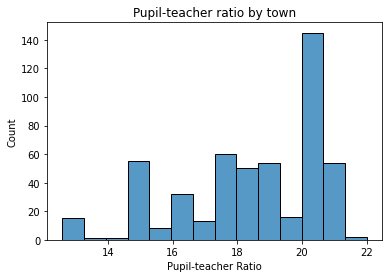

<Figure size 864x576 with 0 Axes>

In [32]:
sns.histplot(x='PTRATIO', data=boston_df);
plt.title('Pupil-teacher ratio by town');
plt.xlabel('Pupil-teacher Ratio');
plt.figure(figsize=(12, 8));

# Hypothesis Testings

###Question 1:
Is there a significant difference in median value of houses bounded by the Charles river or not?

I will use the **t-test** for that, since its two independent variables.

In [ ]:
# H_0: µ_1 = µ_2 -> There IS NOT a significant difference in median value of houses bounded by the Charles river.
# H_1: µ_1 ≠ µ_2 -> There IS a significant difference in median value of houses bounded by the Charles river.

In [34]:
import scipy.stats
alpha = 0.5

In [40]:
# First, let's test the equality of variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we reject the null hyphotesis and assume that there are not equality of variance. But let's move on for the purpose of the exercise.

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [42]:
# t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#####**Conclusion**:
Since the p-value is less than 0.05 we reject the null hyphotesis! 

So we assume that there IS a significant difference in median value of houses bounded by the Charles river.


###Question 2:
Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?

We will use the **ANOVA** test, since there are more than two independent variables.

In [ ]:
# H_0: µ_1 = µ_2 -> -> There IS NOT a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.
# H_1: µ_1 ≠ µ_2 -> There IS a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

In [49]:
# First, let's test the equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                    boston_df[boston_df['age_group'] == '71 years and older']['MEDV'], center='mean')

# since the p-value is greater than 0.05, we do not reject the null hyphotesis. So we assume that there are equality of variance.

LeveneResult(statistic=2.520506764132458, pvalue=0.0814464163906692)

In [56]:
# Getting the variables to the test
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventyone = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventyone_older = boston_df[boston_df['age_group'] == '71 years and older']['MEDV']

In [57]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventyone, seventyone_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 37.777098425714556, P-Value: 5.335030413750619e-16


#####**Conclusion**:
Since the p-value is less than 0.05 we reject the null hyphotesis! 

WE assume that there IS a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.


### Question 3:
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

We will use the Pearson's correlation test.

In [ ]:
# H_0: µ_1 = µ_2 -> There IS NOT a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
# H_1: µ_1 ≠ µ_2 -> There IS a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [59]:
# Pearson's correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

#####**Conclusion**:
Since the p-value is less than 0.05 we reject the null hyphotesis! 

So we assume that there IS a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


### Question 4:
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

We will use Regression analysis to find out.

In [ ]:
# H_0: µ_1 = µ_2 -> There IS NOT a impact with an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.
# H_1: µ_1 ≠ µ_2 -> There IS a impact with an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

In [61]:
# impoting libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
y = boston_df['DIS']
X = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.21e-08
Time:                        17:04:56   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**
since the p-value is less than the alpha (α) level = 0.05, we reject the null hypothesis as there is evidence that there IS a impact with an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 

The coefficient 0.057 means that the impact with an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes is 0.057 